In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os 
for dirpath, dirnames, filenames in os.walk('Data/10_food_classes_all_data'):
    print(f'There a re {len(dirnames)} directories and {len(filenames)} images in "{dirpath}".')

There a re 2 directories and 0 images in "Data/10_food_classes_all_data".
There a re 10 directories and 0 images in "Data/10_food_classes_all_data\test".
There a re 0 directories and 250 images in "Data/10_food_classes_all_data\test\chicken_curry".
There a re 0 directories and 250 images in "Data/10_food_classes_all_data\test\chicken_wings".
There a re 0 directories and 250 images in "Data/10_food_classes_all_data\test\fried_rice".
There a re 0 directories and 250 images in "Data/10_food_classes_all_data\test\grilled_salmon".
There a re 0 directories and 250 images in "Data/10_food_classes_all_data\test\hamburger".
There a re 0 directories and 250 images in "Data/10_food_classes_all_data\test\ice_cream".
There a re 0 directories and 250 images in "Data/10_food_classes_all_data\test\pizza".
There a re 0 directories and 250 images in "Data/10_food_classes_all_data\test\ramen".
There a re 0 directories and 250 images in "Data/10_food_classes_all_data\test\steak".
There a re 0 directories 

In [3]:
train_dir = "Data/10_food_classes_all_data/train"
test_dir = "Data/10_food_classes_all_data/test"

### 3. Create a model (start with a baseline)

In [6]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras import Sequential
from tensorflow.keras import layers

### 5. Evaluate the model

In [9]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    #Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('loss')
    plt.xlabel('epochs')
    plt.legend()

    #Plot the accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('accuracy')
    plt.xlabel('epochs')
    plt.legend()

In [15]:
# Setup data inputs
IMG_SIZE = (224, 224)
train_data_3 = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                           label_mode="categorical",
                                                                           image_size=IMG_SIZE)

test_data_3 = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                               label_mode="categorical",
                                                               image_size=IMG_SIZE)

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [16]:
model_3 = Sequential([
    # Data Augmentation
    layers.RandomFlip("horizontal", input_shape=(224, 224, 3)),
    layers.RandomHeight(0.2),
    layers.RandomWidth(0.2),
    layers.RandomZoom(0.2),
    layers.RandomRotation(0.2),

    # Base Model (EfficientNetV2B0)
    tf.keras.applications.EfficientNetV2B0(
        include_top=False,
        weights='imagenet',
        input_shape=(224, 224, 3),
        pooling=None
    ),

    # Global Average Pooling Layer
    GlobalAveragePooling2D(name="global_average_pooling_2D"),

    # Output Layer
    Dense(10, activation="softmax", name="output_layer")
])

In [17]:
model_3.compile(loss="categorical_crossentropy",
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['accuracy'])

In [18]:
history_3 = model_3.fit(train_data_3,
            epochs = 5,
            steps_per_epoch = len(train_data_3),
            validation_data =test_data_3,
            validation_steps = int(0.25 * len(test_data_3)))

Epoch 1/5


235/235 [==============================] - 922s 4s/step - loss: 0.9625 - accuracy: 0.6969 - val_loss: 0.4893 - val_accuracy: 0.8438
Epoch 2/5
235/235 [==============================] - 896s 4s/step - loss: 0.6138 - accuracy: 0.8113 - val_loss: 0.5904 - val_accuracy: 0.8109
Epoch 3/5
235/235 [==============================] - 842s 4s/step - loss: 0.5270 - accuracy: 0.8345 - val_loss: 0.5390 - val_accuracy: 0.8454
Epoch 4/5
235/235 [==============================] - 885s 4s/step - loss: 0.4558 - accuracy: 0.8521 - val_loss: 0.5368 - val_accuracy: 0.8174
Epoch 5/5
235/235 [==============================] - 957s 4s/step - loss: 0.4113 - accuracy: 0.8643 - val_loss: 0.6546 - val_accuracy: 0.7977


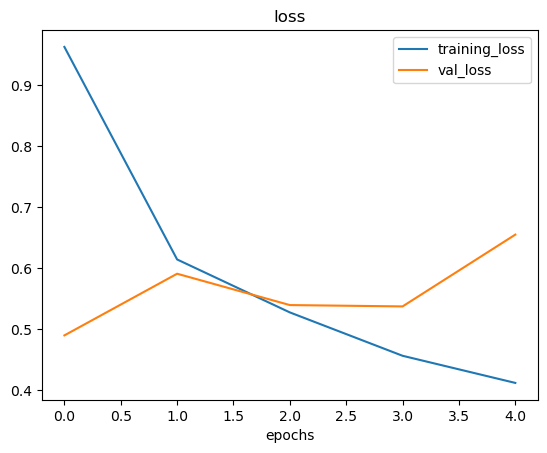

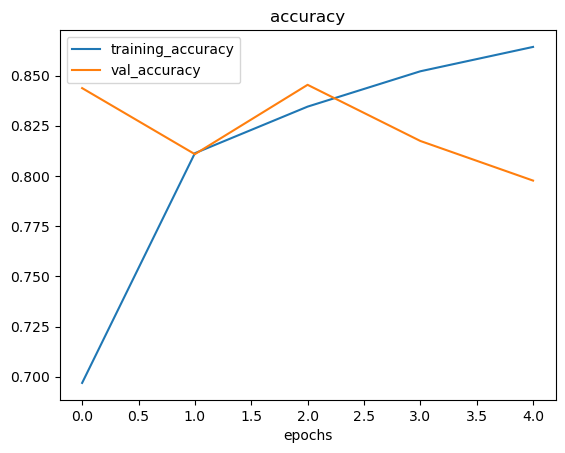

In [19]:
plot_loss_curves(history_3)

In [20]:
model_3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip (RandomFlip)    (None, 224, 224, 3)       0         
                                                                 
 random_height (RandomHeight  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 random_width (RandomWidth)  (None, 224, 224, 3)       0         
                                                                 
 random_zoom (RandomZoom)    (None, 224, 224, 3)       0         
                                                                 
 random_rotation (RandomRota  (None, 224, 224, 3)      0         
 tion)                                                           
                                                                 
 efficientnetv2-b0 (Function  (None, 7, 7, 1280)      

In [21]:
model_3.evaluate(test_data_3)

79/79 [==============================] - 36s 445ms/step - loss: 0.6112 - accuracy: 0.8040


[0.6112322211265564, 0.8039999604225159]

In [22]:
# Let's get the sub directories (these are our class names)
import pathlib
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


In [23]:
def load_and_pred_image(filename, img_shape=224, scale=True):
    """
    Reads an image from filename and turn it into a tensor and reshapes 
    it to (img_shape, img_shape, color_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.io.decode_image(img)

    #Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image and (get all values between 0 and 1)
    if scale:
        return img/255.
    else:
        return img

1/1 [==============================] - 0s 91ms/step


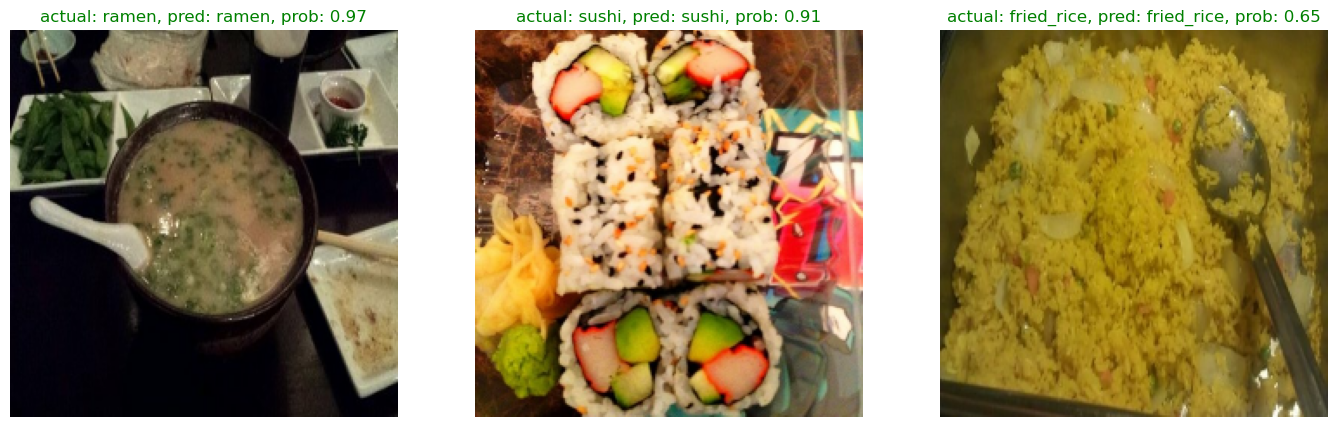

In [24]:
import os
import random

plt.figure(figsize=(17,10))
for i in range(3):
    #choose a random image from random class
    class_name = random.choice(class_names)
    filename = random.choice(os.listdir(os.path.join(test_dir, class_name)))
    filepath = os.path.join(test_dir, class_name, filename)

    #Load the image and make prediction
    img = load_and_pred_image(filepath, scale=False)
    pred_prob = model_3.predict(tf.expand_dims(img, axis=0))
    pred_class = class_names[pred_prob.argmax()]

    #plot the image(s)
    plt.subplot(1, 3, i+1)
    plt.imshow(img/255.)
    if class_name == pred_class:
        title_color = "g"
    else:
        title_color = "r"
    plt.title(f"actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}", c=title_color)
    plt.axis(False)

In [25]:
model_3.save('model/model.h5')